In [ ]:
!pip install ewl

In [1]:
from ewl import *

In [2]:
psi = (Qubit('00') + i * Qubit('11')) / sqrt2  # initial state
psi

sqrt(2)*(|00> + I*|11>)/2

In [3]:
alice = U(theta=pi / 2, alpha=pi / 2, beta=0)  # quantum strategy
alice

Matrix([
[sqrt(2)*I/2,  sqrt(2)*I/2],
[sqrt(2)*I/2, -sqrt(2)*I/2]])

In [4]:
bob = U(theta=0, alpha=0, beta=0)  # classical strategy (C)
bob

Matrix([
[1, 0],
[0, 1]])

In [5]:
ewl = EWL(psi, [alice, bob])
ewl

In [6]:
ewl.J

Matrix([
[  sqrt(2)/2,           0,           0, -sqrt(2)*I/2],
[          0, sqrt(2)*I/2,  -sqrt(2)/2,            0],
[          0,  -sqrt(2)/2, sqrt(2)*I/2,            0],
[sqrt(2)*I/2,           0,           0,   -sqrt(2)/2]])

In [7]:
ewl.J_H

Matrix([
[  sqrt(2)/2,            0,            0, -sqrt(2)*I/2],
[          0, -sqrt(2)*I/2,   -sqrt(2)/2,            0],
[          0,   -sqrt(2)/2, -sqrt(2)*I/2,            0],
[sqrt(2)*I/2,            0,            0,   -sqrt(2)/2]])

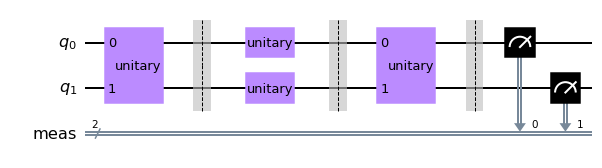

In [8]:
ewl.draw()

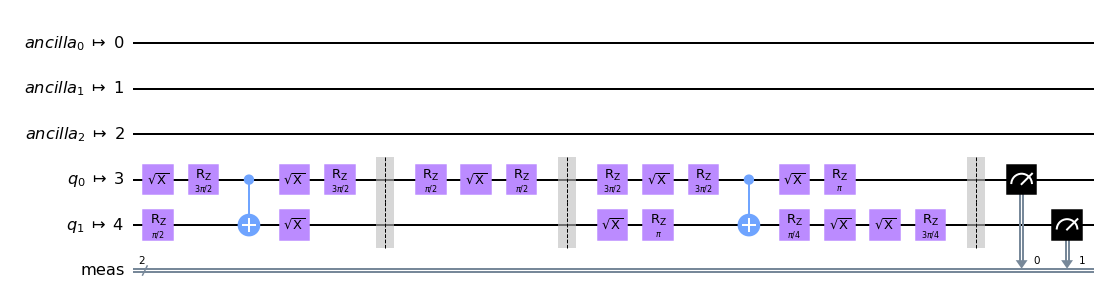

In [9]:
ewl.draw_transpiled(backend_name='ibmq_athens', optimization_level=3)

{'01': 501, '11': 523}


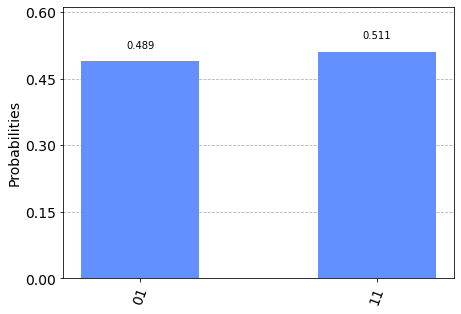

In [10]:
counts_simulated = ewl.simulate()
print(counts_simulated)
plot_histogram(counts_simulated)

Job Status: job has successfully run
{'00': 46, '01': 466, '10': 56, '11': 456}


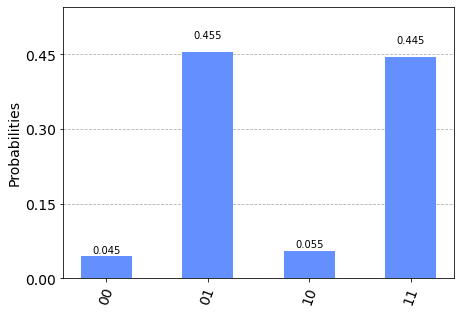

In [11]:
counts_quantum = ewl.run()
print(counts_quantum)
plot_histogram(counts_quantum)

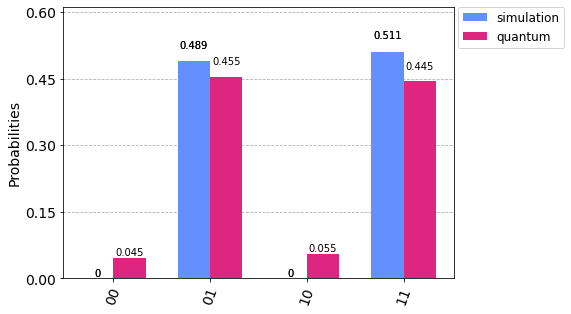

In [12]:
plot_histogram(data=[counts_simulated, counts_quantum], legend=['simulation', 'quantum'])